In [20]:
from keras.datasets import mnist
import numpy as np
(x_train, y_train),(x_test , y_test) = mnist.load_data()

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


Reshaping `x_train` and `x_test` tensors into order 4 because that's how Keras accepts it.  
Also, the last dimension is the depth/channels; for colored images, it would be 3, else for greyscale its 1.

## **Reshape**

Pixel Values in Images:

In grayscale images, pixel values typically range from 0 to 255, where:
0 represents black.
255 represents white.
Values in between represent varying shades of gray.

Normalization:

Dividing by 255.0 scales the pixel values to a range between 0.0 and 1.0.

In [21]:
x_train_vec = x_train.reshape((60000, 28, 28, 1))/255.0
x_test_vec = x_test.reshape((10000, 28, 28, 1))/255.0

print(x_train_vec.shape)
print(x_test_vec.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


## **one hot encoding**

In [22]:
def one_hot_enc(labels,dimension=10):
    results = np.zeros((len(labels),dimension))
    for i,label in enumerate(labels):
        results[i,label] = 1
    return results

y_test_vec = one_hot_enc(y_test)
y_train_vec = one_hot_enc(y_train)

print(y_test_vec.shape)
print(y_train_vec.shape)

(10000, 10)
(60000, 10)


Randomise and split data

In [23]:
rand_indices = np.random.permutation(60000)
train_ind = rand_indices[:50000]
valid_ind = rand_indices[50000:]

x_train = x_train_vec[train_ind]
y_train = y_train_vec[train_ind]

x_valid = x_train_vec[valid_ind]
y_valid = y_train_vec[valid_ind]

print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_valid shape:", x_valid.shape)
print("y_valid shape:", y_valid.shape)

x_train shape: (50000, 28, 28, 1)
y_train shape: (50000, 10)
x_valid shape: (10000, 28, 28, 1)
y_valid shape: (10000, 10)


# **Building the CNN**

In [24]:
from keras import models
from keras import layers

In [25]:
model = models.Sequential()
model.add(layers.Conv2D(10,(5,5),activation='relu',input_shape=(28,28,1)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(20,(5,5),activation='relu'))
model.add(layers.MaxPool2D((2,2)))

#The Flatten layer is used to convert the multi-dimensional output of the 
#convolutional and pooling layers into a 1-dimensional vector. 
#This is necessary because the fully connected (dense) layers in a neural network expect a 1D input
model.add(layers.Flatten())
model.add(layers.Dense(100,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

c:\Users\abdul\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 24, 24, 10)     │           260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 12, 12, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 20)       │         5,020 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 20)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 320)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        32,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,390 (149.96 KB)

 Trainable params: 38,390 (149.96 KB)

 Non-trainable params: 0 (0.00 B)

## Compile the model

optimization algorithm, learning rate(LR), loss function, and metric.

In [27]:
from keras import optimizers
model.compile(
    optimizers.RMSprop(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

## train model 
specify epoch and batch size 

In [28]:
history = model.fit(x_train,y_train, epochs=50, batch_size=128, validation_data=(x_valid,y_valid))

Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.5316 - loss: 1.7901 - val_accuracy: 0.8841 - val_loss: 0.4553
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.8931 - loss: 0.3926 - val_accuracy: 0.9206 - val_loss: 0.2784
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9222 - loss: 0.2615 - val_accuracy: 0.9381 - val_loss: 0.2117
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9376 - loss: 0.2119 - val_accuracy: 0.9470 - val_loss: 0.1759
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9489 - loss: 0.1716 - val_accuracy: 0.9589 - val_loss: 0.1466
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9565 - loss: 0.1446 - val_accuracy: 0.9624 - val_loss: 0.1276
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9633 - loss: 0.1257 - val_accuracy: 0.9668 - val_loss: 0.1127
Epoch 8/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9667 - loss: 0.1116 - val_accur

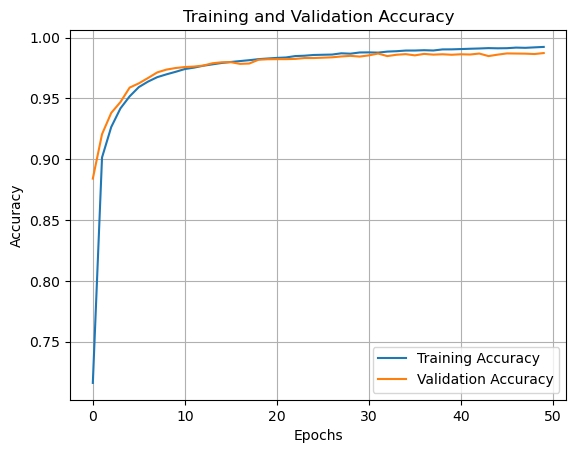

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

epochs = range(50)
train_acc = history.history['accuracy']
valid_acc = history.history['val_accuracy']

plt.plot(epochs, train_acc, label='Training Accuracy')
plt.plot(epochs, valid_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

## Evaluate

In [30]:
loss_and_acc = model.evaluate(x_test_vec, y_test_vec)
print("loss")
print(loss_and_acc[0])
print("\n accuracy")
loss_and_acc[1]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9863 - loss: 0.0422
loss
0.03352439031004906

 accuracy


0.989300012588501

# model with both BN and Dropout layer

In [40]:
model_with_BN_and_DropL = models.Sequential()

model_with_BN_and_DropL.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model_with_BN_and_DropL.add(layers.BatchNormalization()) #BN layer
model_with_BN_and_DropL.add(layers.MaxPooling2D(2, 2))
model_with_BN_and_DropL.add(layers.Dropout(0.25))     #Dropout layer

model_with_BN_and_DropL.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_with_BN_and_DropL.add(layers.BatchNormalization()) #BN layer
model_with_BN_and_DropL.add(layers.MaxPooling2D(2, 2))
model_with_BN_and_DropL.add(layers.Dropout(0.25))     #Dropout layer

model_with_BN_and_DropL.add(layers.Flatten())
model_with_BN_and_DropL.add(layers.Dense(512, activation='relu'))
model_with_BN_and_DropL.add(layers.BatchNormalization()) #BN layer
model_with_BN_and_DropL.add(layers.Dropout(0.5))      #Dropout layer
model_with_BN_and_DropL.add(layers.Dense(10, activation='softmax'))

model_with_BN_and_DropL.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 11, 11, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 512)            │       819,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 846,090 (3.23 MB)

 Trainable params: 844,874 (3.22 MB)

 Non-trainable params: 1,216 (4.75 KB)

In [41]:
from keras.optimizers import RMSprop

model_with_BN_and_DropL.compile(optimizer=RMSprop(learning_rate=0.0001),  
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [43]:
# Retrain the model on the full training set (train + valid)
history_of_BN_and_DropL = model_with_BN_and_DropL.fit(
	np.concatenate((x_train, x_valid)),
	np.concatenate((y_train, y_valid)),
	epochs=20,
	batch_size=128,
	validation_data=(x_valid, y_valid)
)

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 39s 83ms/step - accuracy: 0.9809 - loss: 0.0604 - val_accuracy: 0.9929 - val_loss: 0.0222
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 30s 65ms/step - accuracy: 0.9820 - loss: 0.0565 - val_accuracy: 0.9935 - val_loss: 0.0203
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 29s 62ms/step - accuracy: 0.9841 - loss: 0.0519 - val_accuracy: 0.9938 - val_loss: 0.0184
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 30s 65ms/step - accuracy: 0.9861 - loss: 0.0442 - val_accuracy: 0.9942 - val_loss: 0.0181
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 29s 61ms/step - accuracy: 0.9843 - loss: 0.0471 - val_accuracy: 0.9946 - val_loss: 0.0165
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 35s 76ms/step - accuracy: 0.9864 - loss: 0.0417 - val_accuracy: 0.9946 - val_loss: 0.0155
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 36s 77ms/step - accuracy: 0.9876 - loss: 0.0406 - val_accuracy: 0.9960 - val_loss: 0.0122
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 36s 77ms/step - accuracy: 0.9879 - loss: 0.0374 - 

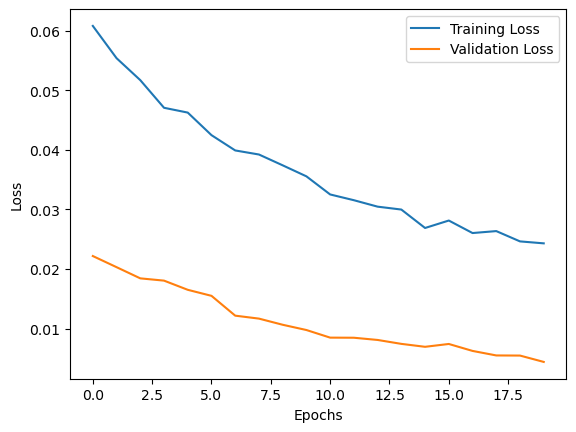

313/313 - 2s - 6ms/step - accuracy: 0.9935 - loss: 0.0194
Test Accuracy: 99.35%


In [46]:
epoch = range(20)  
plt.plot(epoch, history_of_BN_and_DropL.history['loss'], label='Training Loss')
plt.plot(epoch, history_of_BN_and_DropL.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


test_loss, test_accuracy = model_with_BN_and_DropL.evaluate(x_test_vec, y_test_vec, verbose=2)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# model with BN only

In [50]:
# Model with only Batch Normalization
model_with_BN = models.Sequential()

model_with_BN.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model_with_BN.add(layers.BatchNormalization())  # BN layer
model_with_BN.add(layers.MaxPooling2D(2, 2))

model_with_BN.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_with_BN.add(layers.BatchNormalization())  # BN layer
model_with_BN.add(layers.MaxPooling2D(2, 2))

model_with_BN.add(layers.Flatten())
model_with_BN.add(layers.Dense(512, activation='relu'))
model_with_BN.add(layers.BatchNormalization())  # BN layer
model_with_BN.add(layers.Dense(10, activation='softmax'))

model_with_BN.summary()

c:\Users\abdul\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 11, 11, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 512)            │       819,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 846,090 (3.23 MB)

 Trainable params: 844,874 (3.22 MB)

 Non-trainable params: 1,216 (4.75 KB)

In [51]:
model_with_BN.compile(optimizer=RMSprop(learning_rate=0.0001),  
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [53]:
history_of_BN = model_with_BN.fit(np.concatenate((x_train, x_valid)), np.concatenate((y_train, y_valid)), epochs=20, batch_size=128, validation_data=(x_valid, y_valid))

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 34s 73ms/step - accuracy: 0.9721 - loss: 0.0954 - val_accuracy: 0.9741 - val_loss: 0.1034
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 34s 72ms/step - accuracy: 0.9904 - loss: 0.0365 - val_accuracy: 0.9964 - val_loss: 0.0165
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 33s 71ms/step - accuracy: 0.9945 - loss: 0.0210 - val_accuracy: 0.9980 - val_loss: 0.0106
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 33s 71ms/step - accuracy: 0.9969 - loss: 0.0124 - val_accuracy: 0.9992 - val_loss: 0.0058
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 33s 70ms/step - accuracy: 0.9984 - loss: 0.0082 - val_accuracy: 0.9999 - val_loss: 0.0028
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 33s 71ms/step - accuracy: 0.9991 - loss: 0.0052 - val_accuracy: 0.9998 - val_loss: 0.0027
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 35s 75ms/step - accuracy: 0.9997 - loss: 0.0034 - val_accuracy: 1.0000 - val_loss: 0.0014
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 36s 76ms/step - accuracy: 0.9998 - loss: 0.0021 - 

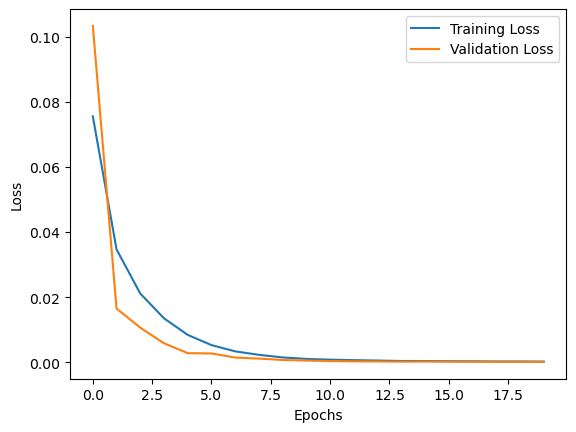

313/313 - 2s - 6ms/step - accuracy: 0.9918 - loss: 0.0280
Test Accuracy: 99.18%


In [55]:
epoch = range(20)  
plt.plot(epoch, history_of_BN.history['loss'], label='Training Loss')
plt.plot(epoch, history_of_BN.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


test_loss, test_accuracy = model_with_BN.evaluate(x_test_vec, y_test_vec, verbose=2)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Model with only Dropout

In [56]:
# Model with only Dropout
model_with_Dropout = models.Sequential()

model_with_Dropout.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model_with_Dropout.add(layers.MaxPooling2D(2, 2))
model_with_Dropout.add(layers.Dropout(0.25))  # Dropout layer

model_with_Dropout.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_with_Dropout.add(layers.MaxPooling2D(2, 2))
model_with_Dropout.add(layers.Dropout(0.25))  # Dropout layer

model_with_Dropout.add(layers.Flatten())
model_with_Dropout.add(layers.Dense(512, activation='relu'))
model_with_Dropout.add(layers.Dropout(0.5))  # Dropout layer
model_with_Dropout.add(layers.Dense(10, activation='softmax'))

model_with_Dropout.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 512)            │       819,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 843,658 (3.22 MB)

 Trainable params: 843,658 (3.22 MB)

 Non-trainable params: 0 (0.00 B)

In [57]:
model_with_Dropout.compile(optimizer=RMSprop(learning_rate=0.0001),  
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [68]:
history_of_DropL = model_with_Dropout.fit(np.concatenate((x_train, x_valid)), np.concatenate((y_train, y_valid)), epochs=20, batch_size=128, validation_data=(x_valid, y_valid))

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - accuracy: 0.9925 - loss: 0.0257 - val_accuracy: 0.9967 - val_loss: 0.0090
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - accuracy: 0.9919 - loss: 0.0264 - val_accuracy: 0.9967 - val_loss: 0.0086
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - accuracy: 0.9924 - loss: 0.0232 - val_accuracy: 0.9969 - val_loss: 0.0083
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 38ms/step - accuracy: 0.9925 - loss: 0.0236 - val_accuracy: 0.9969 - val_loss: 0.0080
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.9912 - loss: 0.0277 - val_accuracy: 0.9968 - val_loss: 0.0079
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - accuracy: 0.9926 - loss: 0.0241 - val_accuracy: 0.9970 - val_loss: 0.0079
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.9923 - loss: 0.0242 - val_accuracy: 0.9975 - val_loss: 0.0075
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.9927 - loss: 0.0237 - 

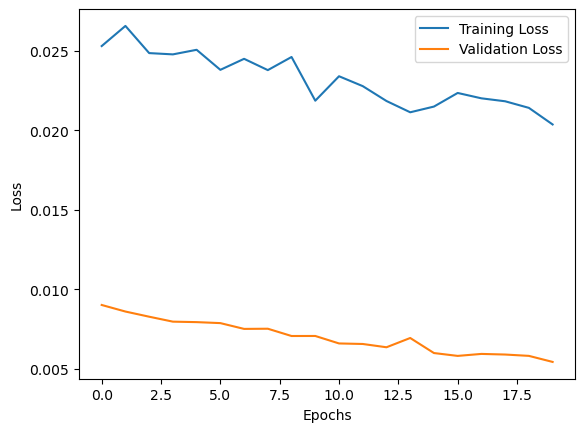

313/313 - 2s - 5ms/step - accuracy: 0.9943 - loss: 0.0180
Test Accuracy: 99.43%


In [69]:
epoch = range(20)  
plt.plot(epoch, history_of_DropL.history['loss'], label='Training Loss')
plt.plot(epoch, history_of_DropL.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


test_loss, test_accuracy = model_with_Dropout.evaluate(x_test_vec, y_test_vec, verbose=2)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

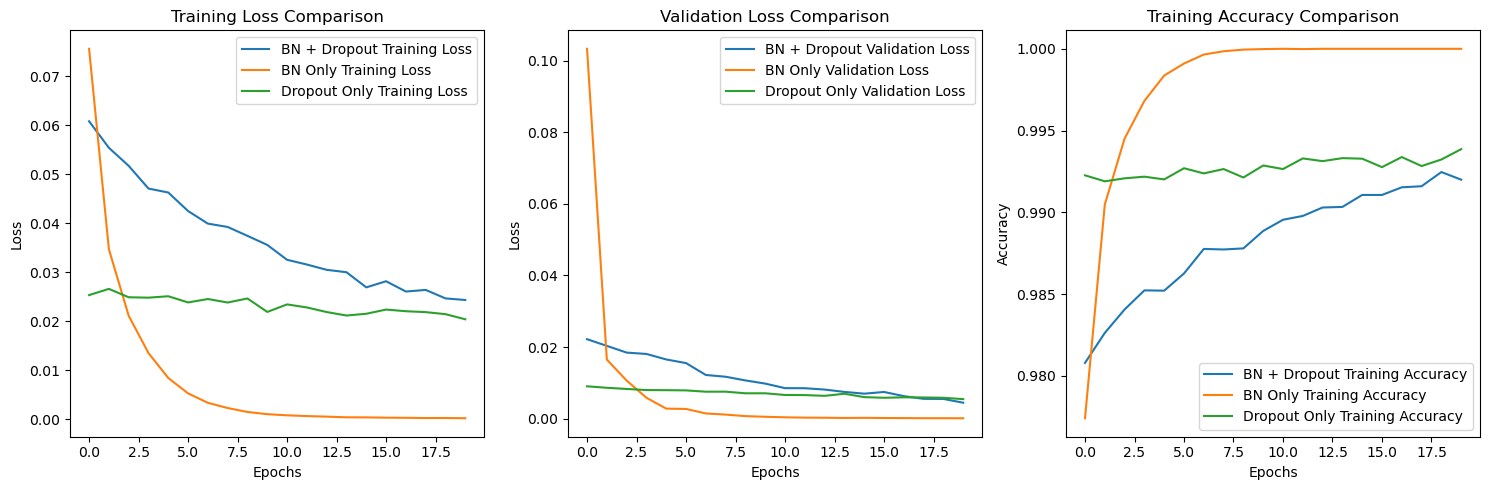

In [72]:
# Plot the loss curves for the latest three models
epoch = range(20)  # Match the number of epochs used in model.fit()
epoch2 = range(20)
# Plot Training Loss
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.plot(epoch, history_of_BN_and_DropL.history['loss'], label='BN + Dropout Training Loss')
plt.plot(epoch, history_of_BN.history['loss'], label='BN Only Training Loss')
plt.plot(epoch2, history_of_DropL.history['loss'], label='Dropout Only Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training Loss Comparison')

# Plot Validation Loss
plt.subplot(1, 3, 2)
plt.plot(epoch, history_of_BN_and_DropL.history['val_loss'], label='BN + Dropout Validation Loss')
plt.plot(epoch, history_of_BN.history['val_loss'], label='BN Only Validation Loss')
plt.plot(epoch2, history_of_DropL.history['val_loss'], label='Dropout Only Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Validation Loss Comparison')


# Plot Test Accuracy
plt.subplot(1, 3, 3)
plt.plot(epoch, history_of_BN_and_DropL.history['accuracy'], label='BN + Dropout Training Accuracy')
plt.plot(epoch, history_of_BN.history['accuracy'], label='BN Only Training Accuracy')
plt.plot(epoch2, history_of_DropL.history['accuracy'], label='Dropout Only Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training Accuracy Comparison')

plt.tight_layout()
plt.show()